In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
# Replace 'reviews.csv' with your dataset file name
data = pd.read_csv('./cleaned_data.csv')

# Ensure there's a 'review' column
if 'Review' not in data.columns:
    raise ValueError("The dataset must contain a 'review' column.")

# Function for sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Classify sentiment as Positive, Negative, or Neutral
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Function for sentiment analysis using VADER
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    # Classify sentiment based on compound score
    if scores['compound'] > 0.05:
        return "Positive"
    elif scores['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply TextBlob sentiment analysis
data['Sentiment_TextBlob'] = data['Review'].apply(analyze_sentiment_textblob)

# Apply VADER sentiment analysis
data['Sentiment_VADER'] = data['Review'].apply(analyze_sentiment_vader)

# Save the results to a new CSV file
data.to_csv('reviews_with_sentiments.csv', index=False)

# Display the first few rows of the dataset
print(data.head())


                                              Review  Rating         Country  \
0     On a recent flight from Cyprus BA621 on 23/...     1.0  United Kingdom   
1     On a recent flight from Cyprus BA621 on 23/...     1.0  United Kingdom   
2     Flight BA 0560 arrived in Rome on 11 Decemb...     1.0       Australia   
3     This was the first time I flew British Airw...     2.0   United States   
4     Pretty good flight but still some small thi...     8.0  United Kingdom   

  Type Of Traveller       Seat Type Recommended           Aircraft  \
0    Family Leisure   Economy Class          no               A320   
1    Family Leisure   Economy Class          no                NaN   
2    Couple Leisure   Economy Class          no                NaN   
3          Business  Business Class          no  Boeing 777 / A350   
4      Solo Leisure  Business Class         yes         Boeing 777   

   Seat Comfort  Cabin Staff Service  Food & Beverages  ...  Ground Service  \
0           2.0    

In [10]:
data.to_csv('data_SA.csv', index=False)

print("The file 'data_SA.csv' has been successfully saved with sentiment analysis results.")


The file 'data_SA.csv' has been successfully saved with sentiment analysis results.


Calculate and Compare Sentiment Distribution between TextBlob and VADER

In [5]:
# Count the occurrences of each sentiment label
textblob_counts = data['Sentiment_TextBlob'].value_counts()
vader_counts = data['Sentiment_VADER'].value_counts()

# Print sentiment distribution
print("TextBlob Sentiment Distribution:")
print(textblob_counts)

print("\nVADER Sentiment Distribution:")
print(vader_counts)

TextBlob Sentiment Distribution:
Positive    2991
Negative    1282
Neutral       21
Name: Sentiment_TextBlob, dtype: int64

VADER Sentiment Distribution:
Positive    2457
Negative    1790
Neutral       47
Name: Sentiment_VADER, dtype: int64


### Distribution: Positive > Negative > Neutral

# Visualization - Bar Chart

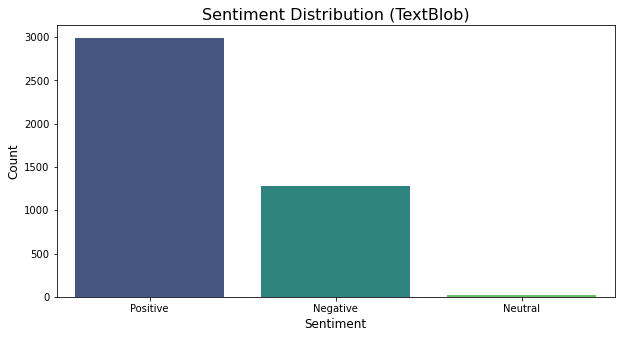

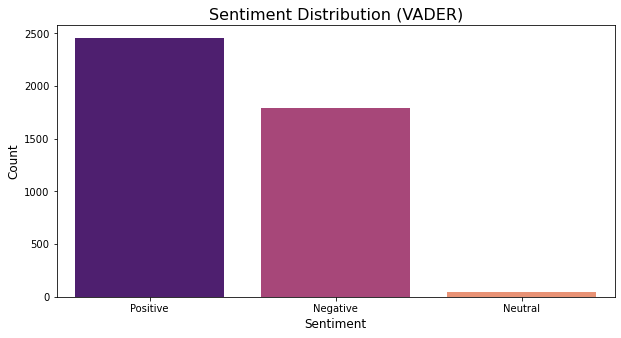

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for TextBlob sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x=textblob_counts.index, y=textblob_counts.values, palette="viridis")
plt.title("Sentiment Distribution (TextBlob)", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Bar chart for VADER sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="magma")
plt.title("Sentiment Distribution (VADER)", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


# Visualization - Pie Chart

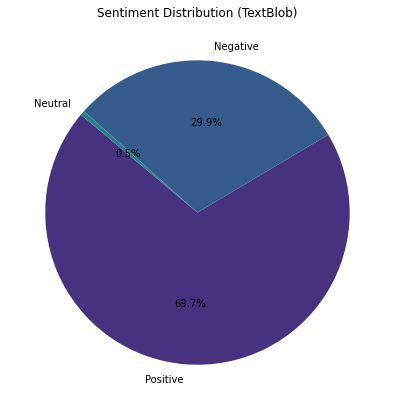

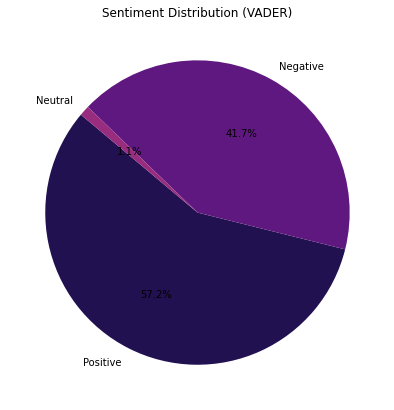

In [7]:
# Pie chart for TextBlob sentiment
plt.figure(figsize=(7, 7))
plt.pie(textblob_counts, labels=textblob_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Sentiment Distribution (TextBlob)")
plt.show()

# Pie chart for VADER sentiment
plt.figure(figsize=(7, 7))
plt.pie(vader_counts, labels=vader_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("magma"))
plt.title("Sentiment Distribution (VADER)")
plt.show()


# Visualization - Grouped Bar Chart

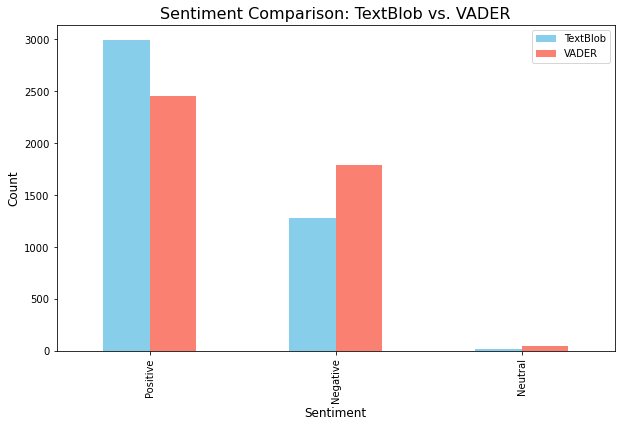

In [8]:
# Combine results into a DataFrame
combined_counts = pd.DataFrame({
    "TextBlob": textblob_counts,
    "VADER": vader_counts
}).fillna(0)

# Plot grouped bar chart
combined_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title("Sentiment Comparison: TextBlob vs. VADER", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["TextBlob", "VADER"])
plt.show()
